In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot

In [96]:
file = "data.csv"
data = pd.read_csv(file,decimal=',')

In [97]:
corr_coef = data.corr()

<AxesSubplot:>

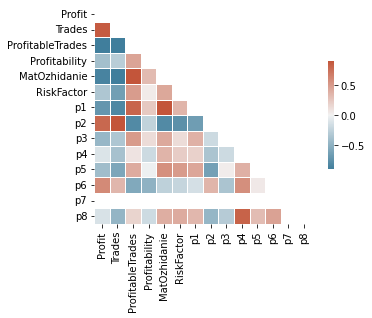

In [98]:
mask = np.triu(np.ones_like(corr_coef, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_coef, mask=mask, cmap=cmap, vmax=0.9, vmin=-0.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#по цвету видим, что есть сильные корреляции между некоторыми признаками

In [99]:
сor_columns = [i for i in corr_coef if corr_coef[i].isnull().drop_duplicates().values[0]]
for i in corr_coef:
    for j in corr_coef.index[corr_coef[i] > 0.9]:
        if i != j and j not in сor_columns and i not in сor_columns:
            сor_columns.append(j)
            print(i, ' <---> ',j, 'Correlation: ',corr_coef[i][corr_coef.index==j].values[0])
#ищем признаки с корреляцией больше 0.9

Trades  <--->  p2 Correlation:  0.9310933269494287
ProfitableTrades  <--->  MatOzhidanie Correlation:  0.90846498196902


In [100]:
for i in сor_columns:
    del data[i]

In [106]:
newdata = data.T

In [107]:
corr_coef = newdata.corr()
сor_columns = []
for i in corr_coef:
    for j in corr_coef.index[corr_coef[i] > 0.92]:
        if i != j and j not in сor_columns and i not in сor_columns:
            сor_columns.append(j)
            print(i, ' <---> ',j, 'Correlation: ',corr_coef[i][corr_coef.index==j].values[0])
#ищем признаки с корреляцией больше 0.9

0  <--->  1 Correlation:  0.9981870894949875
0  <--->  2 Correlation:  0.9996230484443458
0  <--->  3 Correlation:  0.9976885696149392
0  <--->  4 Correlation:  0.9998345502294814
0  <--->  5 Correlation:  0.9995344355795144
0  <--->  6 Correlation:  0.999692716249651
0  <--->  7 Correlation:  0.9985126835636976
0  <--->  8 Correlation:  0.9969937063250824
0  <--->  9 Correlation:  0.9965007300226788
0  <--->  10 Correlation:  0.9337517216859972
0  <--->  11 Correlation:  0.9412836592726418
0  <--->  12 Correlation:  0.92371215900386
0  <--->  13 Correlation:  0.9353975759785617
0  <--->  14 Correlation:  0.9428661805881826
0  <--->  24 Correlation:  0.9484836425910113
0  <--->  26 Correlation:  0.9589703000083436
15  <--->  16 Correlation:  0.9992406809517002
15  <--->  17 Correlation:  0.9981082667716894
15  <--->  18 Correlation:  0.9988713723016782
15  <--->  19 Correlation:  0.9955944242000885
15  <--->  20 Correlation:  0.9922510622106111
15  <--->  21 Correlation:  0.98859253801

In [108]:
for i in сor_columns:
    del newdata[i]

In [109]:
newdata

,0,15,35,39,41
Profit,84.86,73.94,39.78,33.97,32.41
Trades,90.00,34.00,11.00,11.00,10.00
ProfitableTrades,0.59,0.71,0.82,0.91,0.90
Profitability,1.54,3.79,7.51,30.48,197.83
RiskFactor,2.18,4.08,3.80,3.40,3.51
p1,0.80,1.60,2.20,1.80,1.80
p3,-0.80,-0.80,-0.60,-0.80,-0.80
p4,0.10,0.30,0.30,0.10,0.10
p5,1.40,1.00,2.60,1.40,1.80
p6,45.00,45.00,45.00,9.00,9.00


In [110]:
answer = newdata.T

In [111]:
answer

,Profit,Trades,ProfitableTrades,Profitability,RiskFactor,p1,p3,p4,p5,p6,p8
0,84.86,90.0,0.59,1.54,2.18,0.8,-0.8,0.1,1.4,45.0,1.0
15,73.94,34.0,0.71,3.79,4.08,1.6,-0.8,0.3,1.0,45.0,3.0
35,39.78,11.0,0.82,7.51,3.80,2.2,-0.6,0.3,2.6,45.0,1.0
39,33.97,11.0,0.91,30.48,3.40,1.8,-0.8,0.1,1.4,9.0,1.0
41,32.41,10.0,0.90,197.83,3.51,1.8,-0.8,0.1,1.8,9.0,1.0


Осталось 5 строк и 6 меняемых параметров. Также убрали скоррелированные целевые параметры (это можно не делать).